In [112]:
from library.optimiser import *
from library.objective_function import *
from library.post_analysis import *
from library.experiments import *
import time
%matplotlib inline
SEED = 23191

In [131]:
def test_high_dimension(opt):
    num = 10
    length = 10
    max_dim = np.arange(1, 500, 10).shape[0]
    stats = {}
    dims = np.arange(1, 500, 10)
    times = np.zeros((max_dim, ))
    costs = np.zeros((max_dim, ))
    evals = np.zeros((max_dim, ))

    for i, dim in enumerate(np.arange(1, 500, 10)):
        normlise_points = np.random.rand(dim, num) * length
        cost = np.zeros((num, ))
        eval_ = np.zeros((num, ))
        start = time.time()
        for j in range(num):
            opt.x0 = normlise_points[:,j]
            _ , cost[j], stats = opt.optimise(ackley(dim=dim))
            eval_[j] = stats['evals']
        end = time.time()
        s = end - start
        times[i] = s / num
        costs[i] = cost.mean()
        evals[i] = eval_.mean()
    stats['time'] = times
    stats['evals'] = evals
    stats['cost'] = costs
    stats['dims'] = dims
    return stats

In [132]:
class post_analysis_highD:
    def __init__(self, stats):
        self.stats = stats
    def __plot(self, data, ylabel):
        fig = plt.figure(figsize=(10,6))
        ax = plt.subplot(111)
        ax.plot(self.stats['dims'], data)
        ax.set_xlabel("dimention")
        ax.set_ylabel(ylabel)
        
    def plot_time_vs_dim(self):
        self.__plot(self.stats['time'], "time(s)")
        
    def plot_evals_vs_dim(self):
        self.__plot(self.stats['evals'], "evals")
        
    def plot_cost_vs_dim(self):
        self.__plot(self.stats['cost'], "cost")
        

In [ ]:
cma = cma_es()

In [133]:
ad = adam()
ad.verbose = False
stats_ad = test_high_dimension(ad)

In [136]:
ana_ad = post_analysis_highD(stats_ad)

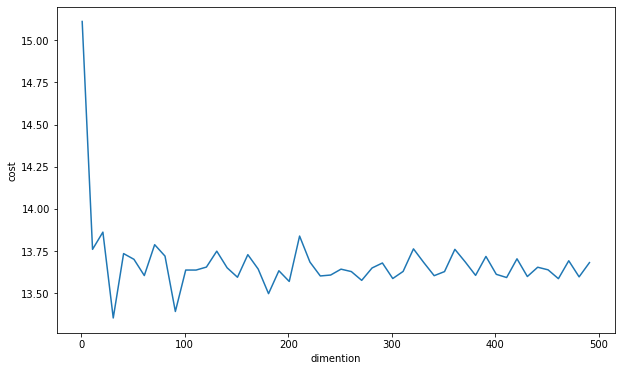

In [137]:
ana_ad.plot_cost_vs_dim()

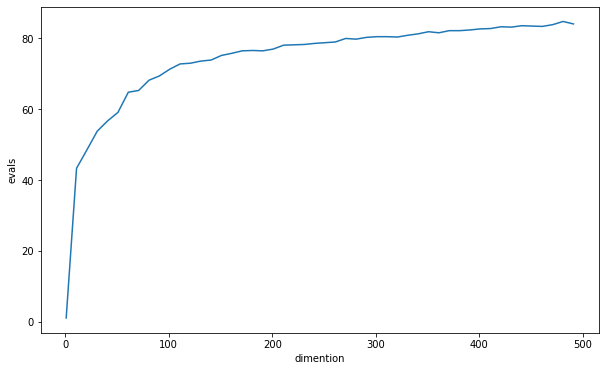

In [138]:
ana_ad.plot_evals_vs_dim()

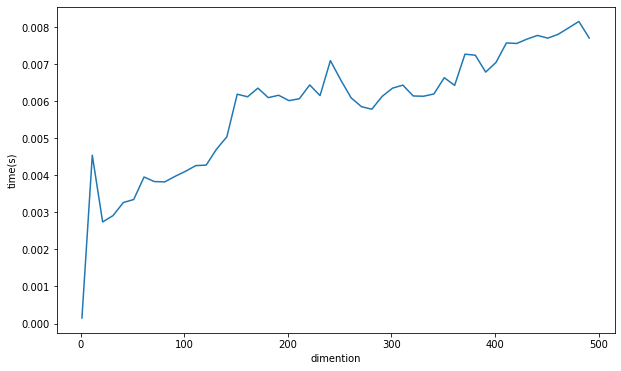

In [139]:
ana_ad.plot_time_vs_dim()

In [ ]:
ana_ad.plot_

In [59]:
cmals = cma_es()

In [ ]:
num = 1
norm = 10
max_dim = np.arange(1, 500, 10).shape[0]
dims = np.arange(1, 500, 10)
times = np.zeros((max_dim, ))
cost_ = np.zeros((max_dim, ))

for i, dim in enumerate(np.arange(1, 500, 10)):
    points = np.random.rand(dim, num)
    normlise_points = points / np.linalg.norm(points, axis=0) * norm
    #probs = np.zeros((num, ))
    costs = np.zeros((num, ))
    evals = np.zeros((num, ))
    start = time.time()
    for j in range(num):
        x0 = normlise_points[:,j]
        ak = ackley(dim=dim)
        cmals.dim = dim
        paras = {'x0': x0,
                 'std': np.ones((dim,)) * 3, 
                 'tol': 1e-5, 
                 'adjust_func': line_search(), 
                 'record': False, 
                 'verbose': False}
        cmals.set_parameters(paras)
        _ ,costs[j], stats = cmals.optimise(ak)
    end = time.time()
    s = exec_time(start, end)
    times[i] = s / num
    cost_[i] = costs.mean()

In [73]:
times[:31]

array([ 0.11569095,  0.54694891,  1.77832603,  3.1556952 ,  4.25439715,
        4.7830739 ,  9.72276783,  7.5497489 , 11.78546405, 12.46482205,
       13.78765798, 16.59674883, 18.1686368 , 21.06956172, 22.95768309,
       25.64481497, 28.63089943, 30.39006782, 33.27890825, 35.56559014,
       39.86449409, 44.82366586, 57.56089711, 58.77844214, 54.20078111,
        2.13337684,  0.37070727,  4.29377413, 14.28205085, 24.16168189,
       23.77196813])

In [76]:
orig = times[:31]

In [77]:
times[25:31] = times[25:31] + 60

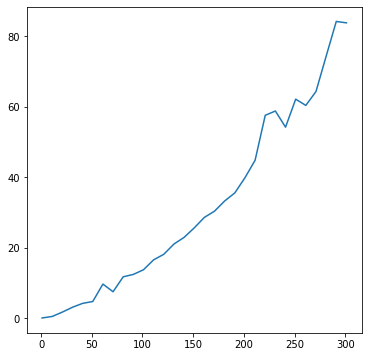

In [78]:
fig = plt.figure(figsize=(6,6))
plt.plot(dims[:31], times[:31])

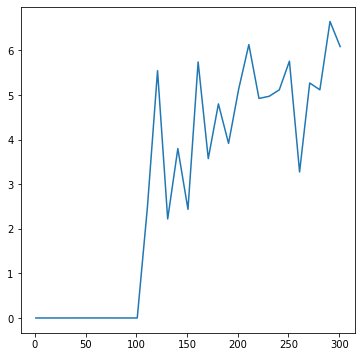

In [79]:
fig = plt.figure(figsize=(6,6))
plt.plot(dims[:31], cost_[:31])